# Análise de Leads - Vitalk

## Importando Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
# Matplotlib 3.4.3 necessário p/ utilizar uma funcionalidade do barplot p/ exibir valores das barras

# !pip install matplotlib --upgrade

In [3]:
df = pd.read_csv("./lead_data.csv")
df.head()

,Negócio - ID,Negócio - Origem do Lead,Organização - Setor,Pessoa - Cargo,Organização - Quantos colaboradores tem a empresa,Negócio - Etapa,Negócio - Status,Negócio - MKT,Negócio - Negócio criado em,Negócio - Data de ganho,Negócio - Data de perda,Negócio - Valor,Negócio - Motivo da perda
0,1896,Inbound,NaN,NaN,NaN,Prospecção,Perdido,Referência | falarinspiravida.com.br,2021-01-04 09:34:56,NaN,2021-01-04 10:33:13,"0,00 BRL",Fora de SLA - Não é empresa
1,1897,Inbound,TI,CEO,0-50,Conexão,Perdido,Outros | ad,2021-01-04 09:41:02,NaN,2021-01-04 10:16:03,"0,00 BRL",Dados Incorretos
2,1898,Inbound,NaN,Loterica,101-500,Conexão,Perdido,Outros | ads,2021-01-04 09:51:06,NaN,2021-01-08 09:26:52,"0,00 BRL",Dados Incorretos/Incompletos
3,1899,Inbound,NaN,NaN,NaN,Conexão,Perdido,Outros | ads,2021-01-04 09:53:59,NaN,2021-01-06 15:31:21,"0,00 BRL",Dados Incorretos/Incompletos
4,1900,Inbound,Serviços de Educação,Analista de RH Pleno,51-100,Maturação,Perdido,NaN,2021-01-04 11:31:53,NaN,2021-07-08 10:49:21,"490,00 BRL",Encontrou outra solução



## Ampliando os dados com colunas adicionais, limpando-os e transformando coluna 'Valor'


In [4]:
df['Negócio - Negócio criado em'] = pd.to_datetime(df['Negócio - Negócio criado em'])
df['Negócio - Data de ganho'] = pd.to_datetime(df['Negócio - Data de ganho'])
df['Negócio - Data de perda'] = pd.to_datetime(df['Negócio - Data de perda'])

df['Negócio - Mês de criação'] = df['Negócio - Negócio criado em'].dt.strftime('%b')
df['Negócio - Mês de ganho'] = df['Negócio - Data de ganho'].dt.strftime('%b')
df['Negócio - Mês de perda'] = df['Negócio - Data de perda'].dt.strftime('%b')

# Retirando setores e cargos dos dados marcados como 'Outros'
df['Organização - Setor'] = df['Organização - Setor'].replace('Outros', np.nan)  
df['Pessoa - Cargo'] = df['Pessoa - Cargo'].replace('Outro', np.nan)

df['Negócio - Valor'] = df['Negócio - Valor'].replace({'[BRL]': '', '\.': '', ' ': ''}, # Transformando valor(moeda BRL) em Float
                                                      regex=True).replace(',', '.', regex=True).astype(float)

df.head()

,Negócio - ID,Negócio - Origem do Lead,Organização - Setor,Pessoa - Cargo,Organização - Quantos colaboradores tem a empresa,Negócio - Etapa,Negócio - Status,Negócio - MKT,Negócio - Negócio criado em,Negócio - Data de ganho,Negócio - Data de perda,Negócio - Valor,Negócio - Motivo da perda,Negócio - Mês de criação,Negócio - Mês de ganho,Negócio - Mês de perda
0,1896,Inbound,NaN,NaN,NaN,Prospecção,Perdido,Referência | falarinspiravida.com.br,2021-01-04 09:34:56,NaT,2021-01-04 10:33:13,0.0,Fora de SLA - Não é empresa,Jan,NaN,Jan
1,1897,Inbound,TI,CEO,0-50,Conexão,Perdido,Outros | ad,2021-01-04 09:41:02,NaT,2021-01-04 10:16:03,0.0,Dados Incorretos,Jan,NaN,Jan
2,1898,Inbound,NaN,Loterica,101-500,Conexão,Perdido,Outros | ads,2021-01-04 09:51:06,NaT,2021-01-08 09:26:52,0.0,Dados Incorretos/Incompletos,Jan,NaN,Jan
3,1899,Inbound,NaN,NaN,NaN,Conexão,Perdido,Outros | ads,2021-01-04 09:53:59,NaT,2021-01-06 15:31:21,0.0,Dados Incorretos/Incompletos,Jan,NaN,Jan
4,1900,Inbound,Serviços de Educação,Analista de RH Pleno,51-100,Maturação,Perdido,NaN,2021-01-04 11:31:53,NaT,2021-07-08 10:49:21,490.0,Encontrou outra solução,Jan,NaN,Jul



## Análise dos dados de leads

### **Negócios**

#### Quantos negócios foram criados por mês?

In [5]:
df['Negócio - Mês de criação'].value_counts()

Aug    554
Jul    222
Apr    198
Mar    185
May    133
Jun    132
Sep    117
Feb    105
Jan     89
Name: Negócio - Mês de criação, dtype: int64

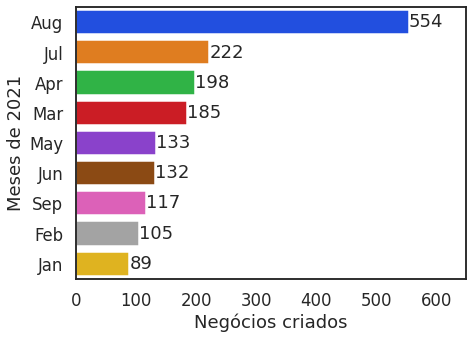

In [6]:
# plotando negócios criados/mês em um countplot
sns.set_theme(style='white', context='talk', palette='bright')

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(y='Negócio - Mês de criação', data=df, order=df['Negócio - Mês de criação'].value_counts().index)
ax.set(xlabel='Negócios criados', ylabel='Meses de 2021')
ax.bar_label(ax.containers[0])
ax.set_xlim(0,650)
plt.show()

In [7]:
max(df['Negócio - Negócio criado em'])

Timestamp('2021-09-15 10:49:09')

No caso acima temos que considerar que, do mês de Setembro, constam somente os dados de 'Negócios criados' até a data máxima de '2021-09-15 10:49:09' não refletindo, portanto, a totalidade dos negócios criados neste mês. 

#### Evolução mensal (quantidade) dos principais setores das organizações que chegaram

Abaixo podemos ver na tabela, agrupados pelo mês de criação, os 3 setores mais frequentes nos negócios criados no determinado mês.

In [8]:
df_sectbymonth = df[['Negócio - Mês de criação', 'Organização - Setor', 'Negócio - Negócio criado em']]
df_sectbymonth = df_sectbymonth.groupby(['Negócio - Mês de criação', 'Organização - Setor']).count()
df_sectbymonth = df_sectbymonth.rename(columns={"Negócio - Negócio criado em": "Ocorrencias"}).reset_index()

df_sectbymonth.sort_values(by=['Negócio - Mês de criação', 'Ocorrencias'], ascending=False, inplace=True)

# Filtrando apenas os 3 mais frequentes setores de cada mês
df_sectbymonth.groupby(['Negócio - Mês de criação']).head(3).style

,Negócio - Mês de criação,Organização - Setor,Ocorrencias
144,Sep,Publicidade e MKT,3
139,Sep,Engenharia Civil,1
140,Sep,Farmacêutica,1
137,May,TI,6
125,May,Consultoria,4
127,May,Farmacêutica,3
123,Mar,Varejo,7
106,Mar,Empresa Júnior,4
108,Mar,Engenharia Civil,3
101,Jun,TI,14


*Ps. Ainda que considere os dados suficientes para responder o solicitado, acredito que com algumas manipulações de GroupBy e ordenando os meses de acordo com o calendario, conseguiria chegar numa visualização mais clara e objetiva.

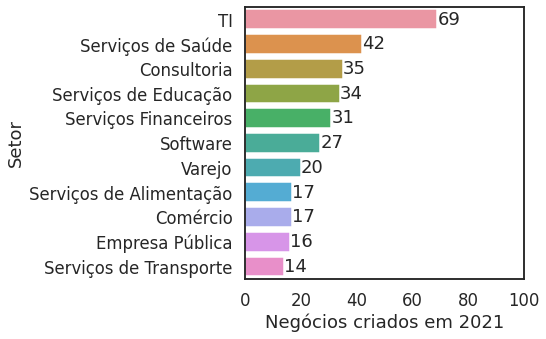

In [9]:
fig, ax2 = plt.subplots(figsize=(5,5))
ax2 = sns.countplot(y='Organização - Setor', data=df, order=df['Organização - Setor'].value_counts().iloc[:11].index)
ax2.set(xlabel='Negócios criados em 2021', ylabel='Setor')
ax2.bar_label(ax2.containers[0])
ax2.set_xlim(0,100)

plt.show()

# Visualização criada p/ referencia, reune dados dos setores dos negócios criados em 2021 (todos os meses)

Aqui, vale destacar que a menor parte dos dados na planilha possui a informação sobre o setor de origem daquele negócio.
Este dado, se coletado com mais frequencia, pode oferecer insights assertivos e interessantes sobre as vendas.

#### Evolução mensal (quantidade) dos principais cargos dos leads que chegaram

Abaixo, podemos ver na tabela os 5 cargos mais frequentes na base de leads, em ordem mensal e com o número de ocorrencias contabilizadas na coluna 'Ocorrencias'. [P/ alterar a quantidade de cargos a exibir, basta trocar o input em ".head(5)" para o número de cargos desejado]

In [10]:
df_posbymonth = df[['Negócio - Mês de criação', 'Pessoa - Cargo', 'Negócio - Negócio criado em']]
df_posbymonth = df_posbymonth.groupby(['Negócio - Mês de criação', 'Pessoa - Cargo']).count()
df_posbymonth = df_posbymonth.rename(columns={"Negócio - Negócio criado em": "Ocorrencias"}).reset_index()

df_posbymonth.sort_values(by=['Negócio - Mês de criação', 'Ocorrencias'], ascending=False, inplace=True)

# Filtrando apenas os 5 mais frequentes cargos dentre os negócios criados, agrupados por mês
df_posbymonth.groupby(['Negócio - Mês de criação']).head(5).style

,Negócio - Mês de criação,Pessoa - Cargo,Ocorrencias
221,Sep,Analista de RH,22
234,Sep,Gerente de RH,17
228,Sep,Coordenador(a) de RH,11
224,Sep,Autônomo,8
225,Sep,CEO,8
194,May,Analista de RH,38
211,May,Gerente de RH,14
197,May,CEO,8
200,May,Coordenador(a) de RH,6
204,May,Diretor(a) de RH,6


*Ps. Ainda que considere os dados suficientes para responder o solicitado, acredito que com algumas manipulações de GroupBy, stack() e ordenação da coluna dos meses, conseguiria chegar numa visualização mais clara e objetiva.

### **Ganhos**

#### Quantos negócios foram fechados por mês?

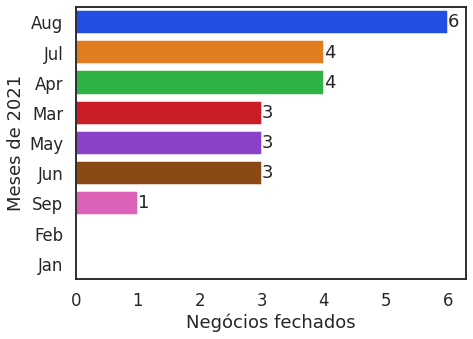

In [11]:
# selecionando, ordenando e plotando em countplot os dados de vendas por mês
fig, ax_cb = plt.subplots(figsize=(7,5))
ax_cb = sns.countplot(y='Negócio - Mês de ganho', data=df, order=df['Negócio - Mês de criação'].value_counts().index)
ax_cb.set(xlabel='Negócios fechados', ylabel='Meses de 2021')
ax_cb.bar_label(ax_cb.containers[0])
plt.show()

#### Qual foi o valor total mensal de vendas?


In [12]:
# selecionando, agrupando e somando os dados de vendas por mês
df_tvm = df.groupby(['Negócio - Mês de ganho'], as_index=False)['Negócio - Valor'].sum()
df_tvm = df_tvm.append(pd.DataFrame([['Feb', 0], ['Jan', 0]], columns=['Negócio - Mês de ganho', 'Negócio - Valor'], index=[7, 8])) # Adicionando meses zerados (Feb e Jan)

# setando ordem categorica (p/ exibir os meses em ordem no eixo x)
df_tvm['Negócio - Mês de ganho'] = pd.Categorical(df_tvm['Negócio - Mês de ganho'],
                                    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'],
                                    ordered=True)

df_tvm

,Negócio - Mês de ganho,Negócio - Valor
0,Apr,1880.00
1,Aug,6412.01
2,Jul,2352.90
3,Jun,3134.33
4,Mar,1680.00
5,May,2954.16
6,Sep,1250.00
7,Feb,0.00
8,Jan,0.00


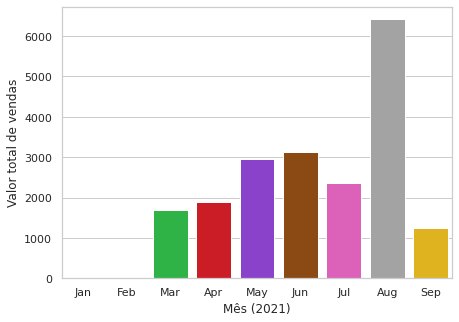

In [13]:
# plot do gráfico em barra
sns.set_theme(style="whitegrid")
fig, ax_tvmb = plt.subplots(figsize=(7,5))
ax_tvmb = sns.barplot(x='Negócio - Mês de ganho', y='Negócio - Valor', data=df_tvm, palette='bright')
ax_tvmb.set(xlabel='Mês (2021)', ylabel='Valor total de vendas')
plt.show()

Vale destacar que, mesmo com números de negócios criados semelhante aos meses sequentes (Março e Abril), Janeiro e Fevereiro não registraram vendas. 
Para entender se isso é um problema e em que magnitude se encaixa, é necessário um maior entendimento do contexto em que se encontra o produto que estamos analisando.

#### Quais os 3 principais setores em número de vendas?

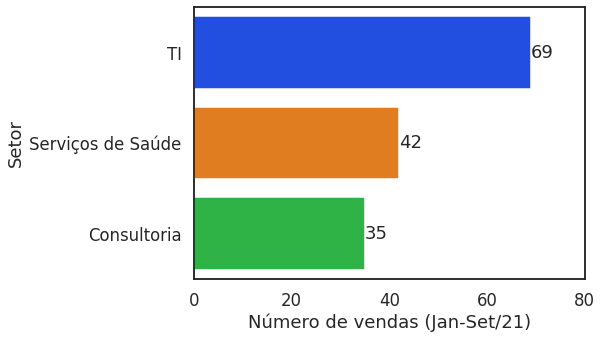

In [14]:
sns.set_theme(style='white', context='talk', palette='bright')
fig, ax_ps = plt.subplots(figsize=(7,5))
ax_ps = sns.countplot(y='Organização - Setor', data=df, order=df['Organização - Setor'].value_counts().iloc[:3].index)
ax_ps.set(xlabel='Número de vendas (Jan-Set/21)', ylabel='Setor')
ax_ps.bar_label(ax_ps.containers[0])
ax_ps.set_xlim(0,80)
plt.show()

### **Perdas**

#### Quantos negócios foram perdidos por mês?

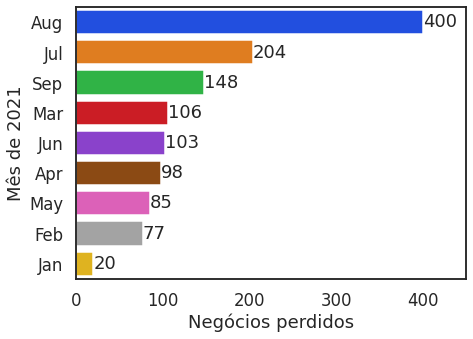

In [15]:
# selecionando, ordenando e plotando em countplot os negócios perdidos/mês
fig, ax_bc = plt.subplots(figsize=(7,5))
ax_bc = sns.countplot(y='Negócio - Mês de perda', data=df, order=df['Negócio - Mês de perda'].value_counts().index)
ax_bc.set(xlabel='Negócios perdidos', ylabel='Mês de 2021')
ax_bc.bar_label(ax_bc.containers[0])
ax_bc.set_xlim(0,450)
plt.show()

Essa visualização, se comparada ao que vimos anteriormente, indica que o aumento superior a 50% nas vendas de Julho pra Agosto
é proporcional ao aumento no volume de negócios perdidos. 
Em complemento, os dados de negócios criados mensalmente também
segue o padrão de aumento de volume, indicando que a alta de mais de 100% em negócios criados entre os dois meses foi, 
provavelmente, o que tornou Agosto o mês de maior sucesso.

#### Quais os 3 principais motivos de perda por etapa por mês?

Na tabela abaixo ordenada primariamente pelo mês e posteriormente pelo número de 'Ocorrencias' por 'Negócio - Etapa', podemos ver os 3 principais motivos de venda e sua quantidade de ocorrencias em cada etapa, em cada mês. 

In [16]:
# transformando, ordenando e filtrando os dados
mp_gb = df.groupby(['Negócio - Mês de perda', 'Negócio - Etapa', 
                    'Negócio - Motivo da perda'])['Negócio - Motivo da perda'].count()
mp_gb = mp_gb.rename("Ocorrencias").reset_index()

mp_gb = mp_gb.sort_values(by=['Negócio - Mês de perda', 'Negócio - Etapa', 
                    'Ocorrencias'], ascending=False)

mp_gb.groupby(['Negócio - Mês de perda', 'Negócio - Etapa']).head(3).style

,Negócio - Mês de perda,Negócio - Etapa,Negócio - Motivo da perda,Ocorrencias
262,Sep,Prospecção,Sem contato com a empresa,16
263,Sep,Prospecção,Sumiu depois da Prospecção (Ghosting),10
259,Sep,Prospecção,Não quer ouvir/agendar Reunião,2
249,Sep,Proposta Enviada,Diretoria não aprovou,2
250,Sep,Proposta Enviada,Não é prioridade no momento,1
251,Sep,Proposta Enviada,Optou pelo concorrente,1
248,Sep,Maturação,Sumiu depois da proposta (Ghosting),8
244,Sep,Maturação,Entrar em contato posteriormente,4
245,Sep,Maturação,Optou pelo concorrente,1
242,Sep,Conexão,Sem contato com a empresa,29


*Ps. Ainda que considere os dados suficientes para responder o solicitado, acredito que com algumas manipulações de GroupBy, stack() e unstack(), conseguiria chegar numa visualização mais clara. Ordenar as etapas de acordo com a ordem descrita no Processo Comercial da Vitalk, e os meses de acordo com o calendário também são updates que agregariam nos quesitos citados anteriormente.